
# Contents of This Note Book
* Importing Libraries and Data Set
* Preprocessing
* Model Creation & Training
* Saving the Model and its Weights
* Model Prediction / Recognition
* TF Model to TF Lite Conversion
* TF Lite Interpreter
* TF Lite Model Prediction

**Importing Libraries**

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

**Importing Data Set**

In [ ]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

# After executing the cell above, Drive files will be present in
# "/content/drive/My Drive"

!ls "/content/drive/My Drive"

os.chdir("/content/drive/My Drive/cal_dataset")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 cal_dataset	    dataset	        Others	   'Voice Controlled Led'
'Colab Notebooks'   dataset_new        'Pics new'  'voice robot'
 conv_audio	   'models & weights'   video	   'Voice Robot raw'
 Data		    new_voice	        voice


**Preprocessing**

In [ ]:
# normalization
train_datagen = ImageDataGenerator(rescale = 1./255)

test_datagen = ImageDataGenerator(rescale = 1./255)

# preparing data set
training_set = train_datagen.flow_from_directory(
                                    '/content/drive/MyDrive/cal_dataset/training_set',
                                                 target_size = (128, 128),
                                                 color_mode = 'grayscale',
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(
                                    '/content/drive/MyDrive/cal_dataset/test_set',
                                            target_size = (128, 128),
                                            color_mode = 'grayscale',
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 8872 images belonging to 13 classes.
Found 260 images belonging to 13 classes.


**Model Creation**

In [ ]:
# initialising the CNN
classifier = Sequential()

# convolution to extract features from images
classifier.add(Conv2D(32, (3, 3), input_shape = (128, 128, 1), activation = 'relu'))

# max pooling to get max / largest values in feature map
# down sampling technique to get the most present features
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# more convolution and max pooling layers
classifier.add(Conv2D(64, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Conv2D(128, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Conv2D(256, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# flattening is converting the data into a 1-dimensional array
classifier.add(Flatten())
classifier.add(Dense(units = 1024, activation = 'relu'))
classifier.add(Dense(units = 13, activation = 'softmax'))

# compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# show summary of the created model
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 128)     

**Model Training**

In [ ]:
# less epochs because we have large number of data set and data set
# is closely related so the model will learn it faster
#history = classifier.fit(training_set,
#               steps_per_epoch = 100,
#               epochs = 3,
#               validation_data = test_set,
#               validation_steps = 2)

history = classifier.fit(training_set,
               epochs = 10,
               validation_data = test_set,
               callbacks=tf.keras.callbacks.EarlyStopping(verbose=1, patience=2)
               )

Epoch 1/10
278/278 [==============================] - 1489s 5s/step - loss: 0.4483 - accuracy: 0.8642 - val_loss: 0.0055 - val_accuracy: 0.9962
Epoch 2/10
278/278 [==============================] - 321s 1s/step - loss: 0.0244 - accuracy: 0.9947 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 3/10
278/278 [==============================] - 324s 1s/step - loss: 0.0045 - accuracy: 0.9993 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 4/10
278/278 [==============================] - 329s 1s/step - loss: 2.5588e-04 - accuracy: 1.0000 - val_loss: 4.1763e-05 - val_accuracy: 1.0000
Epoch 5/10
278/278 [==============================] - 321s 1s/step - loss: 3.9790e-05 - accuracy: 1.0000 - val_loss: 2.0446e-05 - val_accuracy: 1.0000
Epoch 6/10
278/278 [==============================] - 323s 1s/step - loss: 1.4133e-05 - accuracy: 1.0000 - val_loss: 1.0961e-05 - val_accuracy: 1.0000
Epoch 7/10
278/278 [==============================] - 325s 1s/step - loss: 7.9592e-06 - accuracy: 1.0000 - val_loss: 

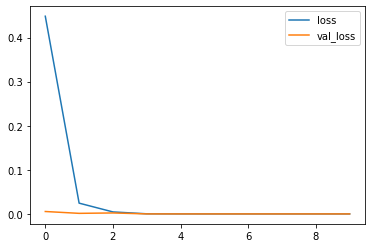

In [ ]:
metrics = history.history
plt.plot(history.epoch, metrics['loss'], metrics['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()

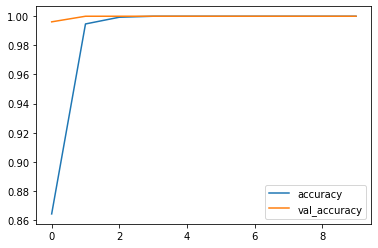

In [ ]:
metrics = history.history
plt.plot(history.epoch, metrics['accuracy'], metrics['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.show()

**Saving Model & Weights**

In [ ]:
# Saving Model and Weights which can be used later without training 
classifier.save("/content/cal_model_new10e.h5")
classifier.save_weights("/content/cal_model_new_weights10e.hdf5")

**Model Size Check**

In [ ]:
# printing model size in mb
print ('TF Size:', round(os.path.getsize('/content/cal_model_new10e.h5')/(1024*1024), 3) , 'MB')

TF Size: 112.662 MB


**Recognition / Prediction**

In [ ]:
# test images are manually upload from the 'files' tab on the left side
# classification models take much time to train, so we can train them one time 
#   and can load them for prediction
# ***load the model first for recognition directly*** 

test_image = image.load_img('/content/40.jpg', target_size = (128, 128), color_mode='grayscale')
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
tf_prediction = np.argmax(result)
print ('TF prediction:', tf_prediction)

TF prediction: 5
TF Size: 112.662 MB


# TF Lite Started

**TF Model to TF Lite Conversion**

In [ ]:
# convert & optimize the model
converter = tf.lite.TFLiteConverter.from_keras_model(classifier)
converter.optimization = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmp3vg9hmkh/assets


**TF Lite Model Saving & Size Check**

In [ ]:
# save the model
open('tflite_model.tflite', 'wb').write(tflite_model)

# model size check
print ('TF Lite Size:', round(os.path.getsize('tflite_model.tflite')/(1024), 3) , 'KB')

TF Lite Size: 38439.242 KB


**Interpreter**

In [ ]:
# 'interpreter' to interpret tf lite model and to get input & output details
# models obtained from 'TfLiteConverter' can be run in python with 'interpreter'
interpreter = tf.lite.Interpreter('tflite_model.tflite')

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# print input & output values & shapes to check everything is same 
# as the orignal tf model.
# data types etc are changed during tf lite conversion & optimizations
print("Input Shape:", input_details[0]['shape'])
print("Input Type:", input_details[0]['dtype'])
print("Output Shape:", output_details[0]['shape'])
print("Output Type:", output_details[0]['dtype'])

Input Shape: [  1 128 128   1]
Input Type: <class 'numpy.float32'>
Output Shape: [ 1 13]
Output Type: <class 'numpy.float32'>


**Prediction from TF Lite Model**

In [ ]:
testx = image.load_img('/content/40.jpg', target_size = (128, 128), color_mode='grayscale')
testx = image.img_to_array(testx)
testx = np.expand_dims(testx, axis = 0)

# needed before execution
# tensorFlow lite pre-plans tensor allocations to optimize inference,
# so the user needs to call allocate_tensors() before any inference.
interpreter.allocate_tensors()
interpreter.set_tensor(input_details[0]['index'], testx)
interpreter.invoke()

# predicting from tf lite model
tflite_model_predictions = interpreter.get_tensor(output_details[0]['index'])

# getting max index 
tf_lite_prediction = np.argmax(tflite_model_predictions)
print ('TF Lite Prediction : ',tf_lite_prediction)

TF Lite Prediction :  5
